# Loading dataset

In [1]:
%plot inline

In [2]:
!cat ../data/wines_classification/winequality.names

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [3]:
!head ../data/wines_classification/winequality-red.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7


In [4]:
data1 = dlmread("../data/wines_classification/winequality-red.csv", ";" ,1, 0); % skip feature names
data2 = dlmread("../data/wines_classification/winequality-white.csv", ";" ,1, 0);
data = [data1; data2];
size(data)

ans =

   6497     12



# Preparing data

In [5]:
% randomize order of data for excluding biases in the dataset
n = rand(length(data),1);
[_ index] = sort(n);
data_rand = data(index, :);

In [6]:
data_norm = [];
mu = [];
sigma = [];

% normalizing data for optimum use of algorithms
for j = 1:size(data_rand,2),
    mu = [mu; mean(data_rand(:,j))];
    sigma = [sigma; std(data_rand(:,j))];
    data_norm = [data_norm, (data_rand(:,j)- mu(j)*ones(size(data,1),1))/sigma(j)];
end

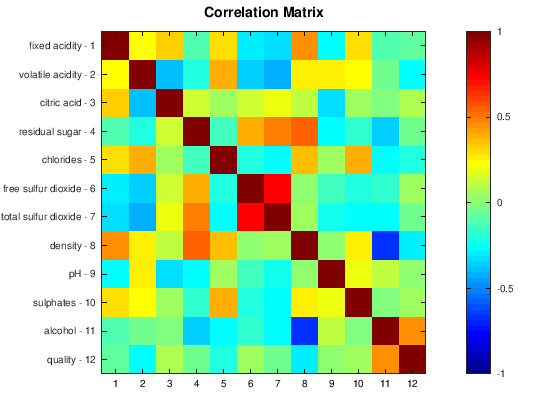

In [7]:
% correlation matrix
cor = corr(data_norm);

imagesc(cor);

set(gca, 'XTick', 1:size(cor,2)); % center x-axis ticks on bins
set(gca, 'YTick', 1:size(cor,2)); % center y-axis ticks on bins
set(gca, 'YTickLabel', ["fixed acidity - 1";"volatile acidity - 2";"citric acid - 3";"residual sugar - 4";
                        "chlorides - 5";"free sulfur dioxide - 6";"total sulfur dioxide - 7";"density - 8";
                        "pH - 9";"sulphates - 10";"alcohol - 11";"quality - 12"]); % set y-axis labels
                        
title('Correlation Matrix', 'FontSize', 14); % set title

caxis([-1, 1]);  % colorbar ranging from -1 to 1
colormap('jet'); % set the colorscheme
colorbar;        % enable colorbar

# Separating into training and testing set

In [8]:
X = [];
y = [];

for i = [1, 2, 3, 4, 5, 6, 9, 10, 11], % drop features 7 and 8
% for i = [2, 5, 11],
    X = [X, data_norm(:,i)]; % inputs
    y = [y, data_norm(:,i)]; % labels
end

In [9]:
X_train = X(1:4548, :); % 70% for training
y_train = y(1:4548);

X_test = X(4549:6497, :);  % 30% for testing
y_test = y(4549:6497);

# ANN Architecture

In [10]:
% M number of labeled inputs
% N number of features (lenght of input vector)
[M, N] = size(X_train)

M =  4548
N =  9


In [11]:
O = 21 % number of neurons in the hidden layer

O =  21


In [12]:
% initial weights matrix as small random values
W = randn([O N]).*0.01; % W: OxN
W_o = randn([1 O]).*0.01;

In [13]:
% adding column for bias
X_train_bias = [ones(size(X_train,1),1), X_train]'; % X_train_bias: MxN+1
X_test_bias = [ones(size(X_test,1),1), X_test]';
W_bias = [ones(size(W,1),1), W]; % W_bias: N+1xO
W_o_bias = [ones(size(W_o,1),1), W_o];

## ANN evaluation function:

Feedfoward output:


$ \mathbf{u} = \mathbf{W^1x} $  
$ \mathbf{a} = f(\mathbf{u}) = \tanh(\mathbf{u})$  
$ y = \sum \mathbf{W^2a}$

$$
    y = \sum \mathbf{W^2}\tanh{(\mathbf{W^1x})}
$$

# Learning

## Backpropagation


Gradient descent for minimizing error function J:

$$
\mathbf{W^{N+1}} = \mathbf{W^N} - \alpha \nabla{J} =  \mathbf{W^N} - \alpha \frac{\partial{J}}{\partial{\mathbf{W}}}
$$

Definig error function as squared error:

$$
J = e^2 = (s-y)^2
$$

Chain rule for finding gradient of J:

$$
\frac{\partial{J}}{\partial{\mathbf{W^2}}} =  \frac{\partial{J}}{\partial{e}} \frac{\partial{e}}{\partial{y}} \frac{\partial{y}}{\partial{\mathbf{W^2}}} = 2 (s - y)(-1) \mathbf{a} = \delta_1 \mathbf{a}
$$

$$
\frac{\partial{J}}{\partial{\mathbf{W^1}}} = \frac{\partial{J}}{\partial{e}} \frac{\partial{e}}{\partial{y}} \frac{\partial{y}}{\partial{\mathbf{a}}} \frac{\partial{\mathbf{a}}}{\partial{\mathbf{u}}} \frac{\partial{\mathbf{u}}}{\partial{\mathbf{W^1}}} = 2 (s-y)(-1) \mathbf{W^2} \mathbf{\dot{F}(u)} \mathbf{x} = \boldsymbol{\delta_1} \mathbf{W^2}\mathbf{\dot{F}(u)} \mathbf {x} = \delta_2 \mathbf{x}
$$

Where the array $\mathbf{\dot{F}(u)}$ is defined as:

$$
\mathbf{\dot{F}(u)} = 
\begin{bmatrix}
  \dot{f}(u_1) & 0 & \cdots  & 0 \\
  0 & \dot{f}(u_2) & \cdots  & 0 \\
  \vdots   & \vdots & \ddots & \vdots \\
  0 & 0 & \cdots  & \dot{f}(u_O) \\
\end{bmatrix}
$$

and:

$\dot{f}(u) = \frac{d \tanh(u)}{du} = sech^2(u)$

Error metric:

$$
MSE = \frac{1}{M}\sum_M e^2 = \frac{1}{M}\sum_M (s - y)^2
$$

In [14]:
% generates F_prime OxO matrix
function F_prime = get_F_prime(u),
    F_prime = zeros(size(u,2), size(u,2));
    for i = 1:size(u,2),
        for j = 1:size(u,2),
            if i==j,
                F_prime(i,j) = (sech(u(1,i)))^2; % F: OxO
            end
        end
    end
end

In [15]:
function [W, MSE] = backprop_batch_step(X, s, W, W_o, alpha),

    [M, N] = size(X);
    O = size(W_o, 2) - 1;

    E = [];
    
            
    update_W_o = zeros(size(W_o));
    update_W   = zeros(size(W));
    
    for i = 1:M,

        % feedfoward
        u = X(:,i)'*W';      % u: 1xO
        a = [1, tanh(u)];    % output of hidden layer a: 1x(O+1)
        y = a*W_o';          % W_o: (O+1)x1, y: 1x1
        
        e = s(i) - y; % e: 1x1
        E = [E; e];   % E: Mx1
        
        delta_o = -2*e;        % e_o: 1x1
        
        F_prime = get_F_prime(u);      % F_prime: OxO
        Delta = -2*e*F_prime*W_o(2:O+1)';     % Delta: OxO
        
        update_W_o = update_W_o + delta_o*a;
        update_W   = update_W   + Delta*X(:,i)';        
    end
    
    W_o = W_o - alpha.*update_W_o;                              
    W = W - alpha.*update_W;

    % metric
    MSE = (E'*E)/M;
end

In [16]:
function [W, mse_train_vec, mse_test_vec] = batch_backpropagation (X_te, X_tr, y_te, y_tr, W, W_o, alpha, epsilon, gamma,
                                                                    show_steps, max_iter),
    mse_test_vec = [];
    mse_train_vec = [];
    mse_test = epsilon+1;
    mse_min = inf;
    counter = 0;
    iter = 0;
    
    % stop if passed gamma steps without improvement 
    % or if error is less than epsilon
    % or if it is the iteration number max_iter
    while counter < gamma && mse_test > epsilon && iter < max_iter,
        mse_before = mse_test;
        mse_test = 0;
        [_, mse_test] = backprop_batch_step(X_te, y_te, W, W_o, alpha);
        mse_test_vec = [mse_test_vec; mse_test];
        [W, mse_train] = backprop_batch_step(X_tr, y_tr, W, W_o, alpha);
        mse_train_vec = [mse_train_vec; mse_train];
        
        if mse_test > mse_min,
            counter = counter + 1;
        else,
            mse_min = mse_test;
            counter = 0;
        end
        
        iter = iter + 1;
        
        if show_steps,
            iter
            [mse_train, mse_test]
        end
    end
    
    iter_min = iter - counter
    mse_min
    
end

In [17]:
# hyperparameters
epsilon = 0.1;
alpha = 10;
gamma = 100;
max_iter = 5000;

In [18]:
% backpropagation for number of hidden neurons as defined above in ANN architecture
[W_out, mse_train_vec, mse_test_vec] = batch_backpropagation(X_test_bias, ...
X_train_bias, y_test, y_train, W_bias, W_o_bias, alpha, epsilon, gamma, 0, max_iter);

iter_min =  79
mse_min =  1.9170


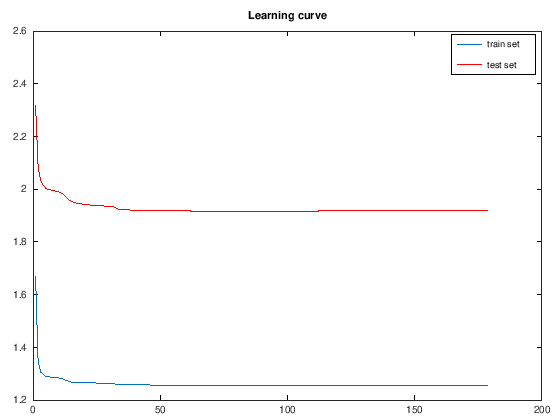

In [19]:
% learning curve
plot(mse_train_vec)
hold on
plot(mse_test_vec, 'r')
title('Learning curve')
legend('train set', 'test set')

neurons_hidden_layer =  10
alpha =  10
iter_min =  88
mse_min =  2.1950
neurons_hidden_layer =  10
alpha =  6
iter_min =  114
mse_min =  2.1836
neurons_hidden_layer =  10
alpha =  3
iter_min =  183
mse_min =  2.1529
neurons_hidden_layer =  10
alpha =  1
iter_min =  673
mse_min =  2.2007
neurons_hidden_layer =  10
alpha =  0.60000
iter_min =  643
mse_min =  2.0676
neurons_hidden_layer =  10
alpha =  0.30000
iter_min =  1765
mse_min =  2.1499
neurons_hidden_layer =  10
alpha =  0.10000
iter_min =  5000
mse_min =  2.2149
neurons_hidden_layer =  50
alpha =  10
iter_min =  5000
mse_min =  1.5468
neurons_hidden_layer =  50
alpha =  6
iter_min =  5000
mse_min =  1.3972
neurons_hidden_layer =  50
alpha =  3
iter_min =  5000
mse_min =  1.5688
neurons_hidden_layer =  50
alpha =  1
iter_min =  5000
mse_min =  1.4611
neurons_hidden_layer =  50
alpha =  0.60000
iter_min =  5000
mse_min =  1.4810
neurons_hidden_layer =  50
alpha =  0.30000
iter_min =  5000
mse_min =  1.4800
neurons_hidden_layer =  5

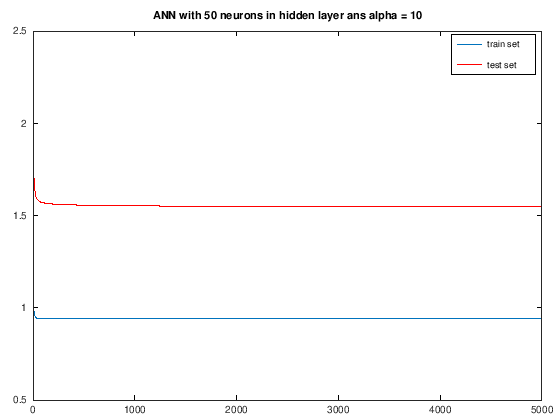

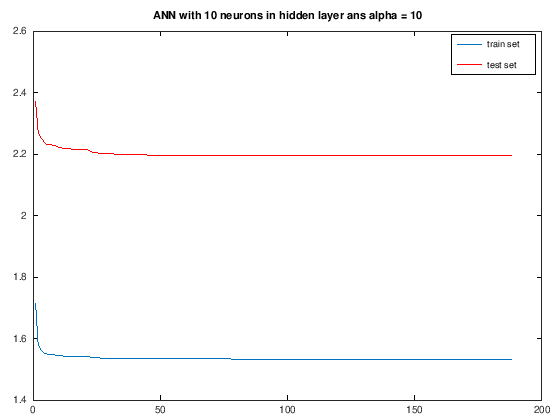

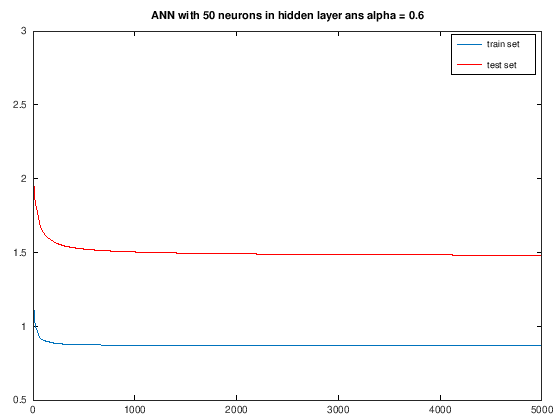

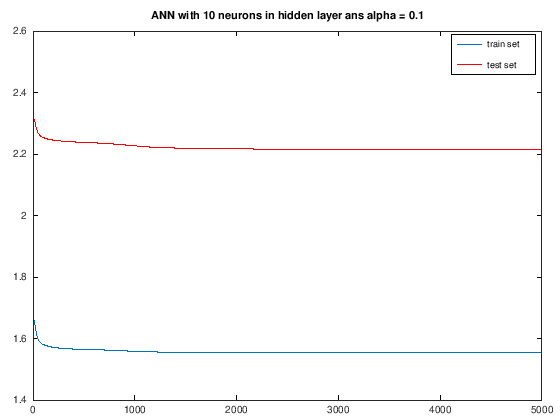

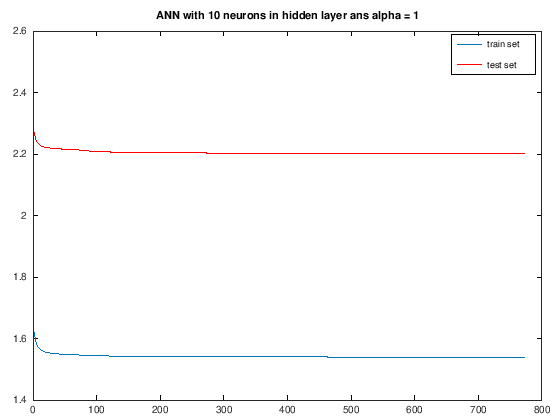

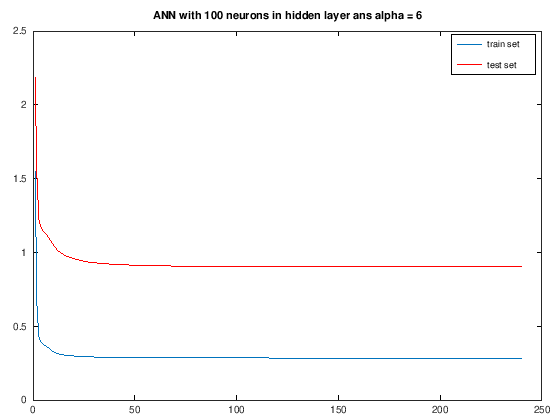

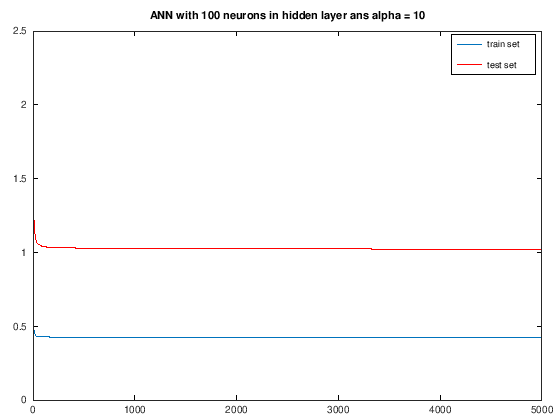

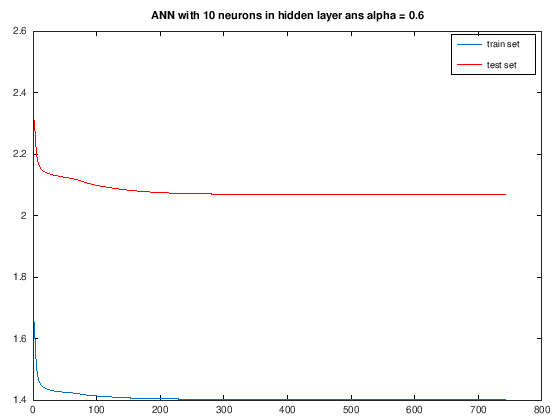

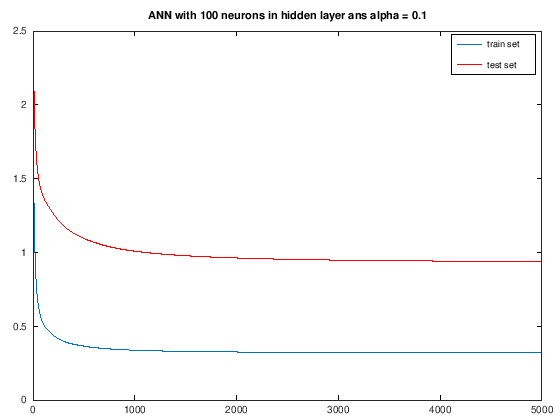

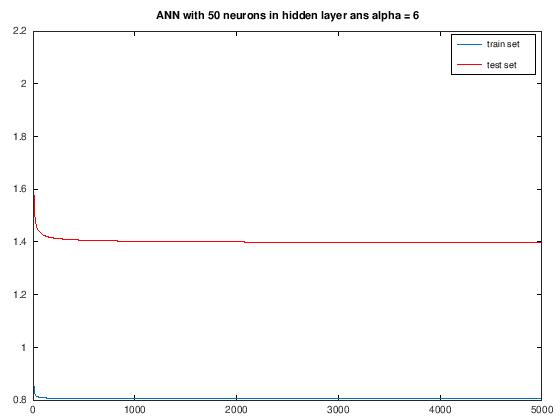

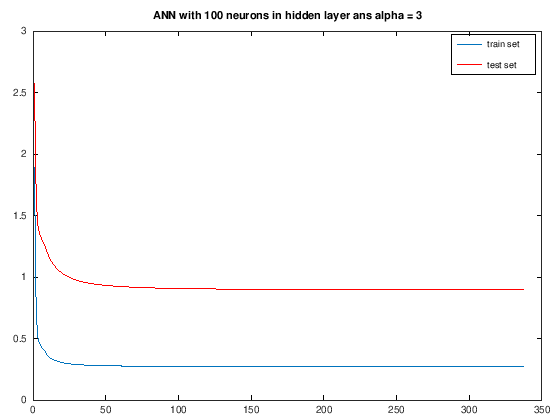

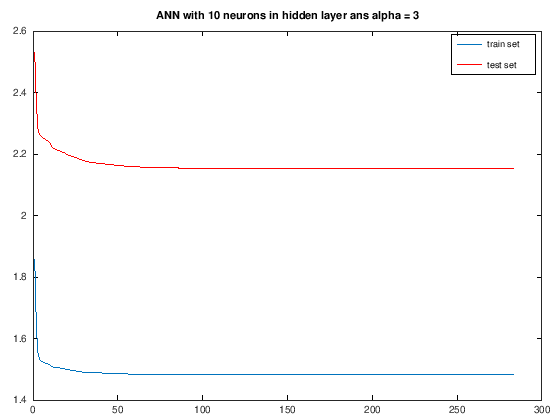

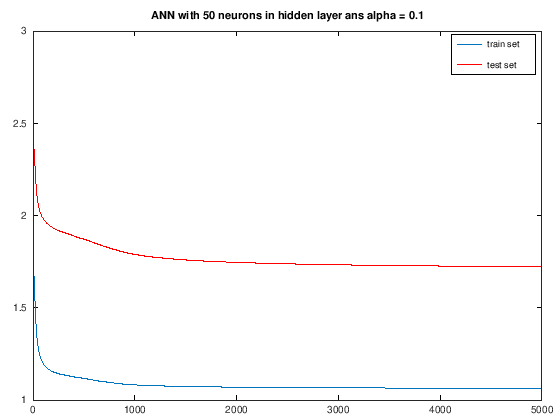

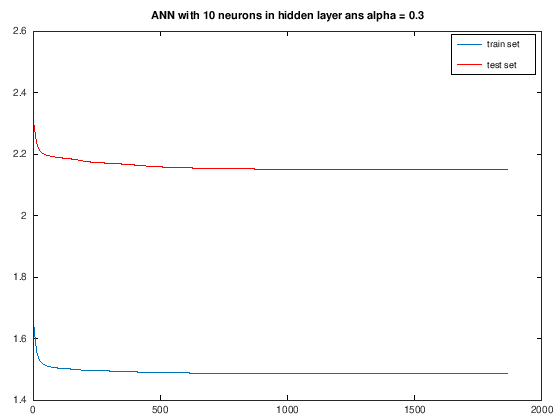

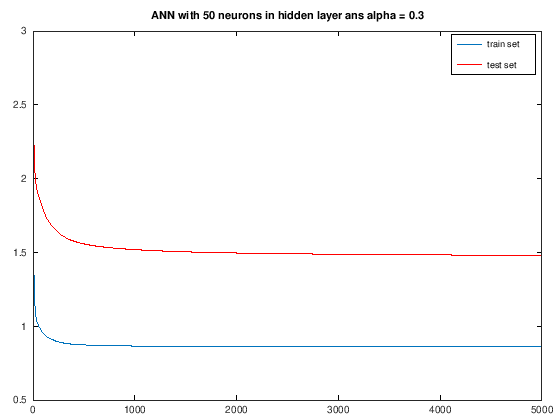

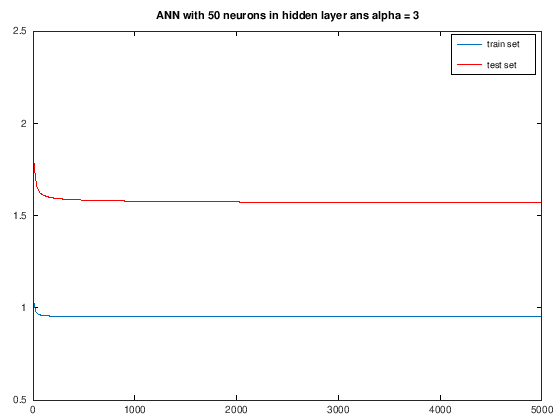

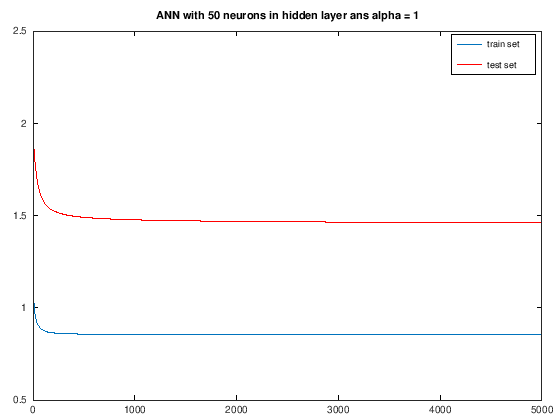

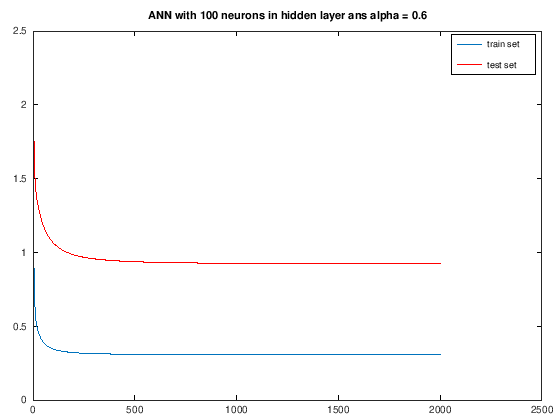

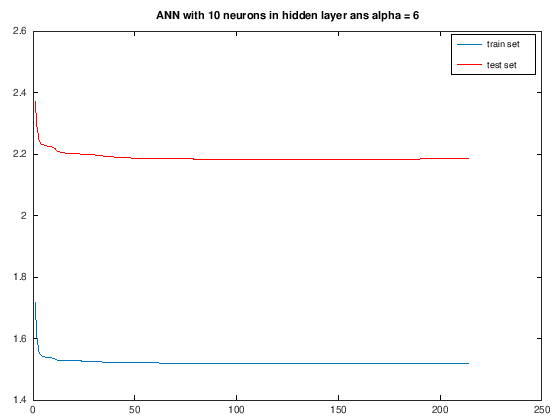

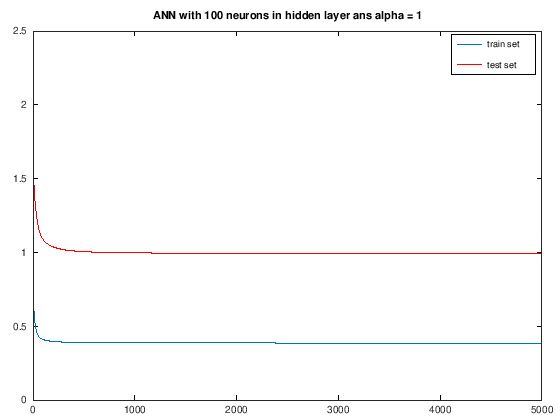

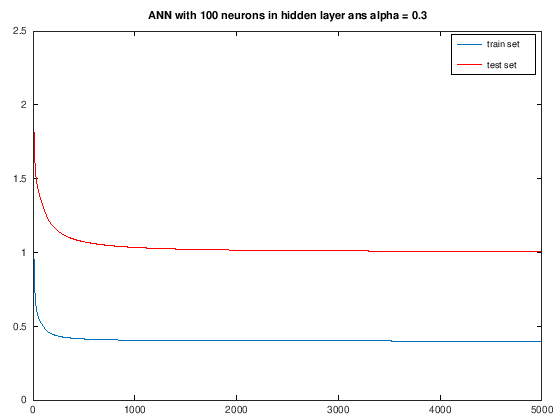

In [20]:
i = 1;
W_out = [];

% comparison of number of neurons in hidden layer
for O = [10, 50, 100],
    for alpha = [10 6 3 1 0.6 0.3 0.1],
    
        neurons_hidden_layer = O
        alpha

        W = randn([O N]).*0.01;
        W_to_store = zeros(size(W));
        W_bias = [ones(size(W,1),1), W];
        
        W_o = randn([1 O]).*0.01;
        W_o_to_store = zeros(size(W_o));
        W_o_bias = [ones(size(W_o,1),1), W_o];

        [W_to_store, mse_train_vec, mse_test_vec] = ...
        batch_backpropagation(X_test_bias, X_train_bias, y_test, y_train, W_bias,
        W_o_bias, alpha, epsilon, gamma, 0, max_iter);
        W_out = [W_out; W_to_store];

        % learning curve
        figure(i)
        plot(mse_train_vec)
        hold on
        plot(mse_test_vec, 'r')
        title(['ANN with ' num2str(O) ' neurons in hidden layer ans alpha = ' num2str(alpha)])
        legend('train set', 'test set')

        i = i+1;
    end
end

alpha =  1
iter_min =  10000
mse_min =  1.1451
alpha =  0.60000
iter_min =  10000
mse_min =  1.1636
alpha =  0.30000
iter_min =  10000
mse_min =  1.1228
alpha =  0.10000
iter_min =  10000
mse_min =  1.1771
alpha =  0.060000
iter_min =  10000
mse_min =  1.1430


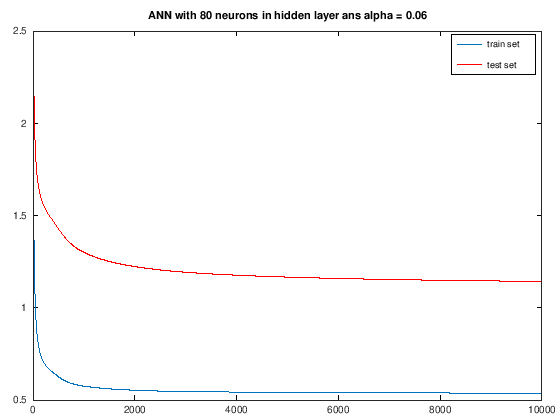

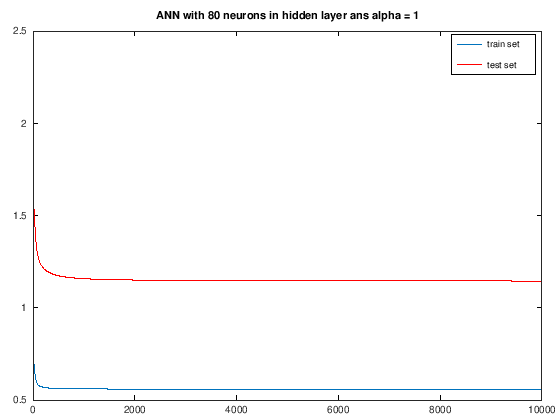

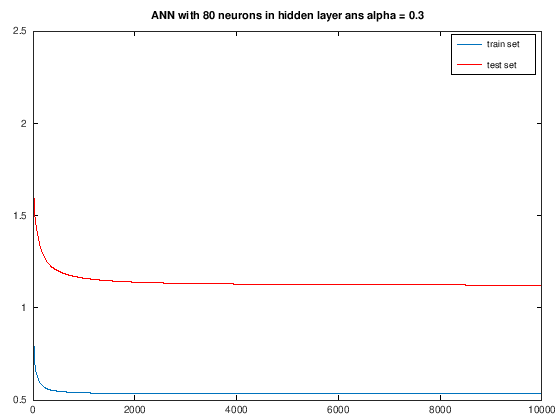

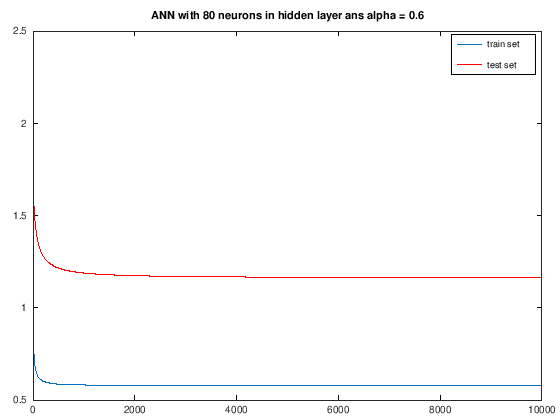

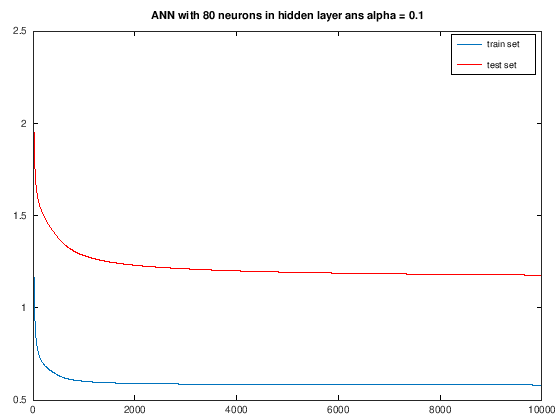

In [21]:
i = 1;
epsilon = 0.01;
max_iter = 10000;
gamma = 50;

for alpha = [1 0.6 0.3 0.1 0.06],
    
        O = 80;
        alpha

        W = randn([O N]).*0.01;
        W_to_store = zeros(size(W));
        W_bias = [ones(size(W,1),1), W];
        
        W_o = randn([1 O]).*0.01;
        W_o_to_store = zeros(size(W_o));
        W_o_bias = [ones(size(W_o,1),1), W_o];

        [W_to_store, mse_train_vec, ...
        mse_test_vec] = batch_backpropagation(X_test_bias, X_train_bias, y_test, y_train, W_bias,
        W_o_bias, alpha, epsilon, gamma, 0, max_iter);
        W_out = [W_out; W_to_store];

        % learning curve
        figure(i)
        plot(mse_train_vec)
        hold on
        plot(mse_test_vec, 'r')
        title(['ANN with ' num2str(O) ' neurons in hidden layer ans alpha = ' num2str(alpha)])
        legend('train set', 'test set')

        i = i+1;
end

In [23]:
O = 100;
W = randn([O N]).*0.01;
W_bias = [ones(size(W,1),1), W];
        
W_o = randn([1 O]).*0.01;
W_o_bias = [ones(size(W_o,1),1), W_o];

% backpropagation for number of hidden neurons as defined above in ANN architecture
[W_out, mse_train_vec, mse_test_vec] = batch_backpropagation(X_test_bias, ...
X_train_bias, y_test, y_train, W_bias, W_o_bias, 3, 0.1, 100, 0, 10000);

iter_min =  209
mse_min =  0.88232


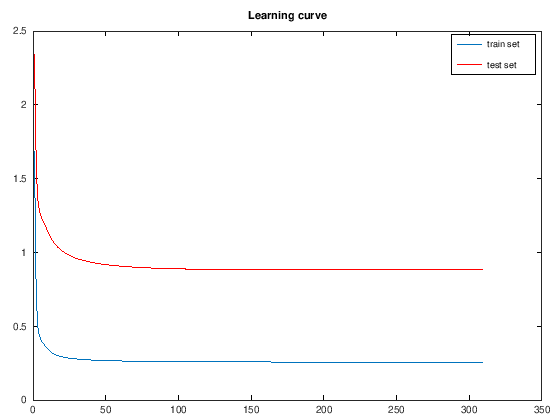

In [24]:
% learning curve
plot(mse_train_vec)
hold on
plot(mse_test_vec, 'r')
title('Learning curve')
legend('train set', 'test set')

alpha =  2
iter_min =  742
mse_min =  0.94172
alpha =  3
iter_min =  510
mse_min =  0.95303
alpha =  4
iter_min =  188
mse_min =  0.90416
alpha =  5
iter_min =  249
mse_min =  0.92984
alpha =  6
iter_min =  320
mse_min =  0.95937


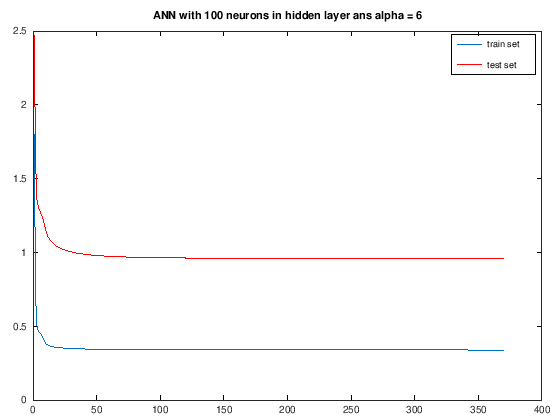

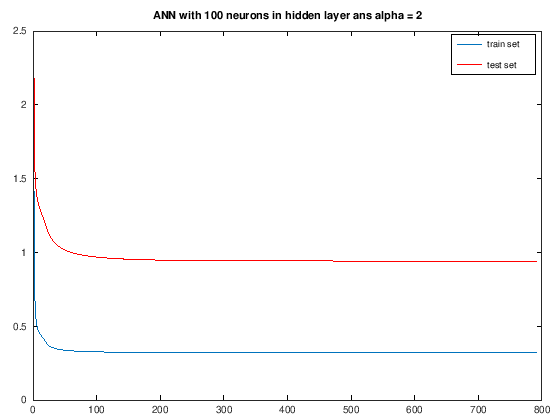

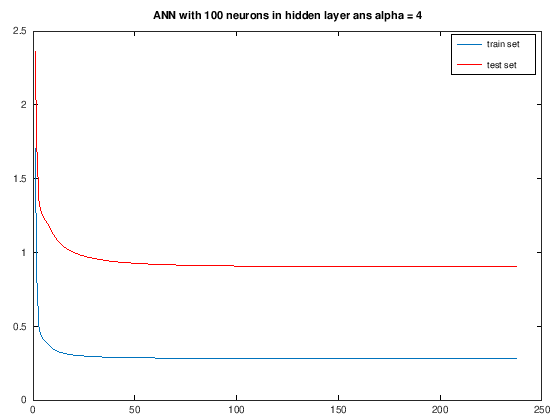

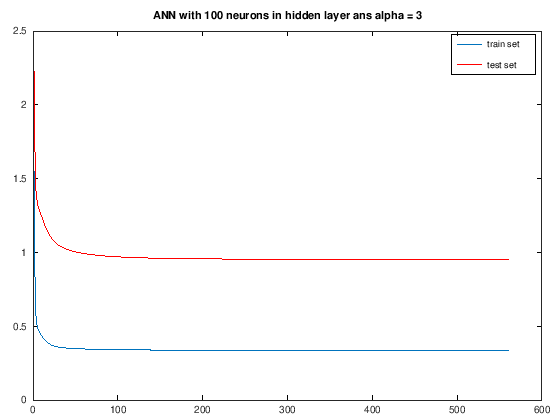

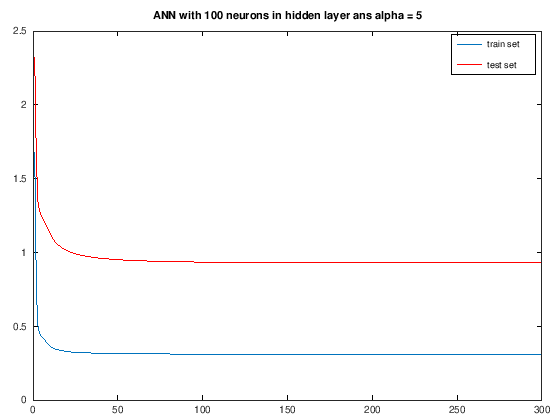

In [41]:
i = 1;
epsilon = 0.1;
max_iter = 1000;
gamma = 50;

for alpha = [2 3 4 5 6],
    
        O = 100;
        alpha

        W = randn([O N]).*0.01;
        W_to_store = zeros(size(W));
        W_bias = [ones(size(W,1),1), W];
        
        W_o = randn([1 O]).*0.01;
        W_o_to_store = zeros(size(W_o));
        W_o_bias = [ones(size(W_o,1),1), W_o];

        [W_to_store, mse_train_vec, ...
        mse_test_vec] = batch_backpropagation(X_test_bias, X_train_bias, y_test, y_train, W_bias,
        W_o_bias, alpha, epsilon, gamma, 0, max_iter);
        W_out = [W_out; W_to_store];

        % learning curve
        figure(i)
        plot(mse_train_vec)
        hold on
        plot(mse_test_vec, 'r')
        title(['ANN with ' num2str(O) ' neurons in hidden layer ans alpha = ' num2str(alpha)])
        legend('train set', 'test set')

        i = i+1;
end